In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
#### Data Visualization here

data_normal = pd.read_csv('ecg_dataset/ptbdb_normal.csv', header = None)
data_abnormal = pd.read_csv('ecg_dataset/ptbdb_abnormal.csv', header = None)
classes_names = {0 : "normal",
                 1 : "abnormal"}

num_cols = data_normal.shape[1] - 1
time = np.arange(0, num_cols) / 125
time = time * 1000
data_normal.columns = list(time) + ["label"]
data_abnormal.columns = list(time) + ["label"]
df_ptbd = pd.concat([data_normal, data_abnormal], axis = 0)
counts = df_ptbd["label"].value_counts()
counts.index = counts.index.map(classes_names)

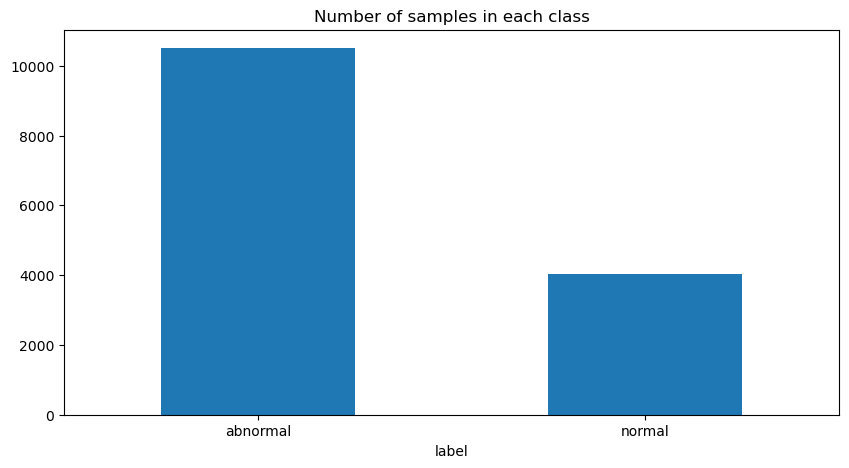

In [16]:
# create a figure
plt.figure(figsize = (10, 5))
# plot a bar chart
counts.plot(kind = "bar")
# plot xticks in angle
plt.xticks(rotation = 0)
plt.title("Number of samples in each class")
plt.show()
plt.close()

In [31]:
#### Data concatenation and preparation here
normal_df = pd.read_csv("ecg_dataset/ptbdb_normal.csv", header=None)
abnormal_df = pd.read_csv("ecg_dataset/ptbdb_abnormal.csv", header=None)

abnormal_df.rename(columns={'187': "Label"}, inplace=True)
normal_df.rename(columns={'187': "Label"}, inplace=True)

#downsample the abnormal df to a size closer to the normal df
abnormal_df = abnormal_df.sample(n=5000, random_state=1)
total_df = pd.concat([normal_df, abnormal_df])

len(total_df)

9046

In [49]:
#### Model init and training here

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

X, y = total_df.iloc[:,:187], total_df.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
    voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

/home/dave/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dave/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dave/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dave/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d arr

Accuracy: 0.79 (+/- 0.01) [Logistic Regression]


/home/dave/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/dave/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/dave/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/dave/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was

Accuracy: 0.96 (+/- 0.01) [Random Forest]
Accuracy: 0.68 (+/- 0.01) [naive Bayes]


/home/dave/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dave/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dave/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/dave/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d arr

Accuracy: 0.87 (+/- 0.01) [Ensemble]
